In [1]:
#Import statements

import os
import random
# import gym
# from gym import Env
import numpy as np
# from gym.spaces import Discrete
from enum import Enum
from statistics import mean
import matplotlib.pyplot as plt

In [9]:
#Battlefield setup

class Player():
    def __init__(self,name, decksize=60, num_creatures = 20, num_spells = 20) :
       self.name = name
       self.life = 20
       self.decksize = decksize
       self.battlefield = []
       self.deck = self.build_deck(num_creatures,num_spells)
       self.hand = []
       self.landforturn = False
       self.opponent= None 
        
    def set_opponent(self, opponent):
        self.opponent = opponent
        
        
    def build_deck(self,num_creatures,num_spells):
        deck = []
        for i in range(num_creatures):
            deck.append('creature')
        for i in range(num_spells):
            deck.append('spell')
        for i in range(self.decksize - num_creatures - num_spells):
            deck.append('land')
        return deck
    
    def draw(self, number_draw = 1):
        try:
            for i in range(number_draw):
                self.hand.append(self.deck.pop(0))
        except IndexError:
            print("Deck size", len(self.deck), "Draw Error")
            
    def attack(self, num_attackers):
        tapper = 0
        for k in range(len(self.battlefield)):
            if self.battlefield[k] == "creature":
                if tapper < num_attackers:
                    self.battlefield[k] = "tapped_creature"
                    tapper += 1
                    
    def block(self, num_block, num_attack):
        counter = 0
        for k in range(num_block):
            if k+1 <= num_attack:
                self.opponent.battlefield.remove("tapped_creature")
                self.battlefield.remove("creature")
        if num_attack >= num_block:
            damage = (num_attack - num_block) * 2
            self.life -= damage
            print(f"{self.name} lost {damage} life.")
        else:
            print("overblocked")
            
    def play(self,  card_choice, target_choice = 0,):
        if card_choice == 'creature': 
            manapool = 0
            tapper = 0
            for k in range(len(self.battlefield)):
                if self.battlefield[k] == 'land':
                    if tapper < 2:
                        self.battlefield[k] = 'tapped_land'
                        tapper += 1
            self.battlefield.append(card_choice)
        elif card_choice == 'spell': #spell
            # Play a spell, target choices are [p1, p2, p1 u_c, p1 t_c, p2 u_c, p2 t_C]
            # going from 1-6
            self.play_spell(target_choice)
        elif card_choice == 'land':
            #if self.player1.landforturn == True:
                #print("You have already played a land for turn")
                #reward(penalty)
                #choose_card_choice([1])
            self.battlefield.append(card_choice)
            self.landforturn = True
        self.hand.remove(card_choice)
            
    def play_spell(self,target_choice):
        tapper = 0        
        for k in range(len(self.battlefield)):
            if self.battlefield[k] == 'land':
                 if tapper < 1:
                    self.battlefield[k] = 'tapped_land'
                    tapper += 1
            # spell effects
            # Based on choice, remove that amount of life or that kind of creature from
            # appopriate battlefield
        if target_choice == "self":
            self.life = self.life - 3
            print(f"{self.name}'s life total was targeted by a spell.")
        elif target_choice == "opponent":
            self.opponent.life = self.opponent.life - 3
            print(f"{self.opponent.name}'s life total was targeted by a spell.")
        elif target_choice == "self_untapped_creature":
            if "creature" in self.battlefield: 
                self.battlefield.remove("creature")
            print(f"{self.name}'s untapped creature was targeted by a spell.")
        elif target_choice == "self_tapped_creature":
            if "tapped_creature" in self.battlefield: 
                self.battlefield.remove("tapped_creature")
            print(f"{self.name}'s tapped creature was targeted by a spell.")
        elif target_choice == "opponent_untapped_creature":
            if "creature" in self.opponent.battlefield: 
                self.opponent.battlefield.remove("creature")
            print(f"{self.opponent.name}'s untapped creature was targeted by a spell.")
        elif target_choice == "opponent_tapped_creature":
            if "tapped_creature" in self.opponent.battlefield:
                self.opponent.battlefield.remove("tapped_creature")
            print(f"{self.opponent.name}'s tapped creature was targeted by a spell.")
        else:
            print("Target acquired " ,target_choice)

    def turn(self):
        self.landforturn = False
        for k in range(len(self.battlefield)):
            if self.battlefield[k] == "tapped_creature":
                    self.battlefield[k] = "creature"
            if self.battlefield[k] == "tapped_land":
                    self.battlefield[k] = "land"
        self.draw()
            
            
class magicgame():
    def __init__(self,player1, player2):
        self.player1 = player1
        self.player2 = player2
        random.shuffle(self.player1.deck)
        random.shuffle(self.player2.deck)
        self.player1.draw(7)    
        self.player2.draw(7)
        #phases for each player will be main phase 1, attacker phase, and blocking phase (1, 2, 3)
        self.phase = 1
        
    #Game Set up

    
    def show_battlefield(self):
        print("\n __________________________________________________________")
        print("\n", self.player2.hand)
        print("\n _____ P2 _____ Life: ", self.player2.life)
        for k in range(len(self.player2.battlefield)):
            #L = untapped land
            if self.player2.battlefield[k] == "land":
                print("L", end = " ")
            #l = tapped land
            elif self.player2.battlefield[k] == "tapped_land":
                print("l", end = " ")
        print("\n")
        for k in range(len(self.player2.battlefield)):
            #C = untapped creature
            if self.player2.battlefield[k] == "creature":
                print("C", end = " ")
            #c = tapped creature
            elif self.player2.battlefield[k] == "tapped_creature":
                print("c", end = " ")
        print("\n")
        for k in range(len(self.player1.battlefield)):
            if self.player1.battlefield[k] == "creature":
                print("C", end = " ")
            elif self.player1.battlefield[k] == "tapped_creature":
                print("c", end = " ")
        print("\n")
        for k in range(len(self.player1.battlefield)):
            if self.player1.battlefield[k] == "land":
                print("L", end = " ")
            elif self.player1.battlefield[k] == "tapped_land":
                print("l", end = " ")
        print("\n _____ P1 _____ Life: ", self.player1.life)
        print("\n", self.player1.hand)
        
    
    def nextphase(self):
        self.phase += 1
        if self.phase == 4:
            self.phase = 11
        elif self.phase == 14:
            self.phase = 1
        else:
            pass
        
    def show_winner(p1, p2, deck):
        print("P1 life: " + str(p1))
        print("P2 life: " + str(p2))
        print("P1 Deck size", len(player1.deck))
        print("P2 Deck size", len(player2.deck))
        winner = ""
        if p1 < 1:
            print("P1 loses, P2 wins")
            winner = "P2"
        elif p2 < 1:
            print("P2 loses, P1 wins")
            winner = "P1"
        elif len(deck) < 0:
            print("P2 has no more cards in library, P1 wins")
            winner = "P1"
        else:
            pass
        return winner    
            
        

In [10]:
#Player Actions

def chooseAction(value, prob):
        decision = np.random.choice(value, p = prob)
        return decision

In [11]:
def playgame(player1,player2):
    game = magicgame(player1,player2)
    while (game.player1.life > 0 and game.player2.life > 0) and (len(game.player2.deck) > 0):
        # p1 phase 1
        #call creature tracker, set output = previous_state_tup
        if game.phase == 1:
            # show the battle field
            game.show_battlefield()
            print("What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2, \
                P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),\
                     2 = land, 8 = pass phase")
            
            numConv = {"creature":0, 
                        "spell":1, 
                         "land":2, 
                          "P1 T creature":4,
                          "P2 U creature":5, 
                         "P2 T creature": 6,
                          "pass phase":8}
            
            p1_decision = None
            if game.player1.battlefield.count("land") >= 2:
                if game.player1.landforturn == False:
                    if "land" in game.player1.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("creature" in game.player1.hand) and ("spell" not in game.player1.hand):
                            values.append("creature")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player1.hand) and ("creature" not in game.player1.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player1.hand) and "creature" in game.player1.hand:
                            values.append("spell")
                            values.append("creature")
                            prob = [0.7,0.1,0.1,0.1]
                        p1_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player1.hand))
                        num_choices.append("pass phase")
                        p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player1.hand).difference(set(["land"])))
                    num_choices.append("pass phase")
                    p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            elif game.player1.battlefield.count("land") == 1:
                if game.player1.landforturn == False:
                    if "land" in game.player1.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("spell" in game.player1.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        else:
                            print("You only have one untapped mana. You can't play a creature and you don't have a spell.")
                        p1_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player1.hand).difference(set(["creature"])))
                        num_choices.append("pass phase")
                        p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player1.hand).difference(set(["creature","land"])))
                    num_choices.append("pass phase")
                    p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            else:
                if game.player1.landforturn == False:
                    if "land" in game.player1.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        p1_decision = chooseAction(values,prob)
                    else:
                        p1_decision = "pass phase"
                else:
                    p1_decision = "pass phase"
                    print("No more moves. Pass the turn")
            
            p2_decision = None
            
        # Stopped here

            # If player one plays a spell
            if p1_decision == "spell":
                # Player one choose target
                print("Target?")
                #######
                ## These numbers needs to be discussed
                values = ["self","opponent"]
                probs = [.05,.95]
                p1_set_creatures = set(game.player1.battlefield).difference(set(["land","tapped_land"]))
                print(p1_set_creatures, "P1 valid targets")
                p2_set_creatures = set(game.player2.battlefield).difference(set(["land","tapped_land"]))
                print(p2_set_creatures, "P2 valid targets")
                if len(p1_set_creatures) != 0 and len(p2_set_creatures) == 0:
                    probs = [.05, .85]
                    temp_probs = [.1/len(p1_set_creatures)] * len(p1_set_creatures)
                    probs += temp_probs
                    if "creature" in game.player1.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("self_tapped_creature")
                elif len(p1_set_creatures) == 0 and len(p2_set_creatures) != 0:
                    probs = [.05]
                    temp_probs = [.95/(len(p2_set_creatures)+1)] * (len(p2_set_creatures)+1)
                    probs += temp_probs
                    if "creature" in game.player2.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("opponent_tapped_creature")
                elif len(p1_set_creatures) != 0 and len(p2_set_creatures) != 0:
                    probs = [.05]
                    temp = .85/(len(p2_set_creatures)+1)
                    probs.append(temp)
                    temp_probs_p1 = [.1/len(p1_set_creatures)]*len(p1_set_creatures)
                    probs += temp_probs_p1
                    temp_probs_p2 = [temp]*len(p2_set_creatures)
                    probs += temp_probs_p2
                    if "creature" in game.player1.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("self_tapped_creature")
                    if "creature" in game.player2.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("opponent_tapped_creature")
                #######
                target = np.random.choice(values, p = probs) #P1 wants to target P2 stuff
                game.player1.play(p1_decision, target)
            elif p1_decision == "pass phase":
                game.nextphase()
            else:
                game.player1.play(p1_decision)
                
        
        elif game.phase == 2:
            game.show_battlefield()
            print("How many P1 attackers? Any N attackers, 0 is pass")
            #global num_attack
            print(f'{game.player1.battlefield.count("creature")} p1 battlefield')
            num_attackers = list(range(0,game.player1.battlefield.count("creature")+1))
            probs = [1/(game.player1.battlefield.count("creature")+2)]*(game.player1.battlefield.count("creature"))
            probs.append(2/(game.player1.battlefield.count("creature")+2))
            num_attack = np.random.choice(num_attackers, p = probs) # needs to be random
            print("Player 1 is attacking with " + str(num_attack) + " creatures.")
            game.player1.attack(num_attack)
            game.nextphase()
            
        elif game.phase == 3:
            if num_attack == 0:
                pass
            else:
                game.show_battlefield()
                print("How many P2 blockers? Any N blockers, 0 is pass")
                values = list(range(0,game.player2.battlefield.count("creature")+1))
                probs = [1/(game.player2.battlefield.count("creature")+2)]*(game.player2.battlefield.count("creature"))
                probs.append(2/(game.player2.battlefield.count("creature")+2))
                p2_decision = np.random.choice(values,p = probs) # needs to be random
                print("Player 2 is blocking with " + str(p2_decision) + " creatures.")
                game.player2.block(p2_decision, num_attack)
            game.player2.turn()
            game.nextphase()
            
        elif game.phase == 11:
            game.show_battlefield()
            print("What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2, \
                P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),\
                     2 = land, 8 = pass phase")
            
            p2_decision = None
            if game.player2.battlefield.count("land") >= 2:
                if game.player2.landforturn == False:
                    if "land" in game.player2.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("creature" in game.player2.hand) and ("spell" not in game.player2.hand):
                            values.append("creature")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player2.hand) and ("creature" not in game.player2.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player2.hand) and "creature" in game.player2.hand:
                            values.append("spell")
                            values.append("creature")
                            prob = [0.7,0.1,0.1,0.1]
                        p2_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player2.hand))
                        num_choices.append("pass phase")
                        p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player2.hand).difference(set(["land"])))
                    num_choices.append("pass phase")
                    p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            elif game.player2.battlefield.count("land") == 1:
                if game.player2.landforturn == False:
                    if "land" in game.player2.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("spell" in game.player2.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        else:
                            print("You only have one untapped mana. You can't play a creature and you don't have a spell.")
                        p2_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player2.hand).difference(set(["creature"])))
                        num_choices.append("pass phase")
                        p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player2.hand).difference(set(["creature","land"])))
                    num_choices.append("pass phase")
                    p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            else:
                if game.player2.landforturn == False:
                    if "land" in game.player2.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        p2_decision = chooseAction(values,prob)
                    else:
                        p2_decision = "pass phase"
                else:
                    p2_decision = "pass phase"
                    print("No more moves. Pass the turn")

            # If player one plays a spell
            if p2_decision == "spell":
                # Player one choose target
                print("Target?")
                #######
                ## These numbers needs to be discussed
                values = ["self","opponent"]
                probs = [.05,.95]
                p1_set_creatures = set(game.player1.battlefield).difference(set(["land","tapped_land"]))
                print(p1_set_creatures, "P1 valid targets")
                p2_set_creatures = set(game.player2.battlefield).difference(set(["land","tapped_land"]))
                print(p2_set_creatures, "P2 valid targets")
                if len(p2_set_creatures) != 0 and len(p1_set_creatures) == 0:
                    probs = [.05, .85]
                    temp_probs = [.1/len(p2_set_creatures)] * len(p2_set_creatures)
                    probs += temp_probs
                    if "creature" in game.player2.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("self_tapped_creature")
                elif len(p2_set_creatures) == 0 and len(p1_set_creatures) != 0:
                    probs = [.05]
                    temp_probs = [.95/(len(p1_set_creatures)+1)] * (len(p1_set_creatures)+1)
                    probs += temp_probs
                    if "creature" in game.player1.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("opponent_tapped_creature")
                elif len(p2_set_creatures) != 0 and len(p1_set_creatures) != 0:
                    probs = [.05]
                    temp = .85/(len(p1_set_creatures)+1)
                    probs.append(temp)
                    temp_probs_p2 = [.1/len(p2_set_creatures)]*len(p2_set_creatures)
                    probs += temp_probs_p2
                    temp_probs_p1 = [temp]*len(p1_set_creatures)
                    probs += temp_probs_p1
                    if "creature" in game.player2.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("self_tapped_creature")
                    if "creature" in game.player1.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("opponent_tapped_creature")
                #######
                target = np.random.choice(values, p = probs) #P1 wants to target P2 stuff
                game.player2.play(p2_decision, target)
            elif p2_decision == "pass phase":
                game.nextphase()
            else:
                game.player2.play(p2_decision)
                
        elif game.phase == 12:
            game.show_battlefield()
            print("How many P2 attackers? Any N attackers, 0 is pass")
            #global num_attack
            print(f'{game.player2.battlefield.count("creature")} p2 battlefield')
            num_attackers = list(range(0,game.player2.battlefield.count("creature")+1))
            probs = [1/(game.player2.battlefield.count("creature")+2)]*(game.player2.battlefield.count("creature"))
            probs.append(2/(game.player2.battlefield.count("creature")+2))
            num_attack = np.random.choice(num_attackers, p = probs) # needs to be random
            print("Player 2 is attacking with " + str(num_attack) + " creatures.")
            game.player2.attack(num_attack)
            game.nextphase()
        elif game.phase == 13:
            if num_attack == 0:
                pass
            else:
                game.show_battlefield()
                print("How many P1 blockers? Any N blockers, 0 is pass")
                values = list(range(0,game.player1.battlefield.count("creature")+1))
                probs = [1/(game.player1.battlefield.count("creature")+2)]*(game.player1.battlefield.count("creature"))
                probs.append(2/(game.player1.battlefield.count("creature")+2))
                p1_decision = np.random.choice(values,p = probs) # needs to be random
                print("Player 1 is blocking with " + str(p1_decision) + " creatures.")
                game.player1.block(p1_decision, num_attack)
            game.nextphase()
            game.player1.turn()
    winner = magicgame.show_winner(game.player1.life, game.player2.life, game.player2.deck)
    winners.append(winner)
            

In [12]:
%%capture
winners = []
win_ratio = np.empty(100)
for j in range(100):
    for i in range(100):
        print("Game", i+1)
        player1 = Player('player 1')
        player2 = Player('player 2')
        player1.set_opponent(player2)
        player2.set_opponent(player1)
        playgame(player1,player2)
    win_ratio[j] = winners.count('P1')/len(winners)
    

(array([ 3.,  2., 42., 42.,  8.,  1.,  0.,  1.,  0.,  1.]),
 array([0.51066667, 0.5131    , 0.51553333, 0.51796667, 0.5204    ,
        0.52283333, 0.52526667, 0.5277    , 0.53013333, 0.53256667,
        0.535     ]),
 <a list of 10 Patch objects>)

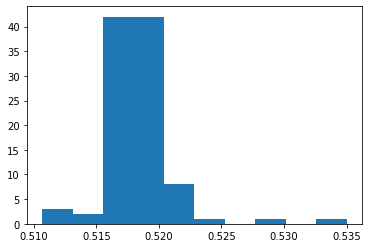

In [13]:
plt.hist(win_ratio)

In [14]:
# Want P2 to have adaptive strategy, keep P1 consistent b/c P1 has significant advantage. (90% of the time a more than 50% chance of winning)

In [16]:
np.sum(win_ratio > .5)/len(win_ratio)

1.0